In [1]:
import pandas as pd

In [12]:
train = pd.read_csv("./bike/train.csv")
test = pd.read_csv("./bike/test.csv")
sub = pd.read_csv("./bike/sampleSubmission.csv")

In [21]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [23]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [24]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [32]:
train['datetime'].value_counts()

2012-08-05 06:00:00    1
2011-04-16 21:00:00    1
2012-10-16 04:00:00    1
2012-02-19 05:00:00    1
2011-03-04 10:00:00    1
                      ..
2011-12-04 22:00:00    1
2011-03-08 01:00:00    1
2011-05-07 01:00:00    1
2012-11-04 15:00:00    1
2012-10-13 11:00:00    1
Name: datetime, Length: 10886, dtype: int64

In [33]:
sub.count

<bound method DataFrame.count of                  datetime  count
0     2011-01-20 00:00:00      0
1     2011-01-20 01:00:00      0
2     2011-01-20 02:00:00      0
3     2011-01-20 03:00:00      0
4     2011-01-20 04:00:00      0
...                   ...    ...
6488  2012-12-31 19:00:00      0
6489  2012-12-31 20:00:00      0
6490  2012-12-31 21:00:00      0
6491  2012-12-31 22:00:00      0
6492  2012-12-31 23:00:00      0

[6493 rows x 2 columns]>

In [16]:
sub

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [36]:
print( train.info() )
print()
print( test.info() )
print()
print( sub.info() )
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      

In [54]:
# 데이터 분리
sel = ['season', 'weather']
X_train = train[sel]      # 입력
y_train = train['count']  # 출력

X_test = test[sel]

In [55]:
from sklearn.linear_model import LinearRegression

In [57]:
#모델선택, 머신생성
model = LinearRegression()

#학습용데이터
model.fit(X_train, y_train)

LinearRegression()

In [58]:
print(model.coef_)  # 회귀계수
print(model.intercept_)  # 절편

[ 26.71208253 -37.18595972]
177.36283373081733


In [59]:
pred = model.predict(X_test)  # 새로운 데이터에 대한 count를 예측

In [60]:
len(pred)

6493

In [63]:
sub['count'] = pred
sub.to_csv("First_Kaggle.csv", index=False)

#### 3-2

In [65]:
# 데이터 분리
sel = ['humidity','windspeed']
X_train = train[sel]      # 입력
y_train = train['count']  # 출력

X_test = test[sel]

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
#모델선택, 머신생성
model = LinearRegression()

#학습용데이터
model.fit(X_train, y_train)

LinearRegression()

In [68]:
print(model.coef_)  # 회귀계수
print(model.intercept_)  # 절편

[-2.98642515  0.00623997]
376.3135434149693


In [69]:
pred = model.predict(X_test)  # 새로운 데이터에 대한 count를 예측

In [70]:
len(pred)

6493

In [71]:
sub['count'] = pred
sub.to_csv("First_Kaggle01.csv", index=False)

### 효율을 올려봅시다.,..

In [72]:
# 데이터 분리
sel = ['season','temp','atemp','windspeed']
X_train = train[sel]      # 입력
y_train = train['count']  # 출력

X_test = test[sel]

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
#모델선택, 머신생성
model = LinearRegression()

#학습용데이터셋 이용
model.fit(X_train, y_train)
pred = model.predict(X_test)  # 새로운 데이터에 대한 count를 예측

In [97]:
sub['count'] = pred
sub.loc[sub['count'] < 0, "count" ] = 0
sub.to_csv("2nd_Sub.csv", index=False)

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([4.083e+03, 3.316e+03, 1.992e+03, 8.810e+02, 3.870e+02, 1.380e+02,
        6.000e+01, 2.300e+01, 3.000e+00, 3.000e+00]),
 array([ 6.0032 , 11.10257, 16.20194, 21.30131, 26.40068, 31.50005,
        36.59942, 41.69879, 46.79816, 51.89753, 56.9969 ]),
 <a list of 10 Patch objects>)

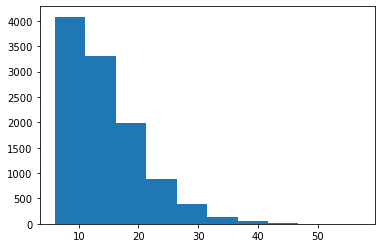

In [102]:
plt.hist(train['windspeed'])

### 바람 등의 변수(0)인것을 제외시켜 보자...

In [103]:
len( train.loc[ train['windspeed'] ==0,] )

0

In [89]:
import numpy as np
print( np.median(train['windspeed']) )

12.998


In [91]:
# 중앙값으로 대체
train.loc[ train['windspeed'] ==0 , 'windspeed' ] = np.median(train['windspeed'])
test.loc[ test['windspeed'] ==0 , 'windspeed' ] = np.median(test['windspeed'])

In [92]:
# 0인 것을 대체 되었는지 확인
print( len( train.loc[ train['windspeed'] ==0 ,  ] ) )

0


In [93]:
# 특징(feature) 선택 및 모델 만들기
# 데이터를 분리, X_train, y_train, X_test
sel = ['atemp', 'windspeed']
X_train = train[sel]      # 입력
y_train = train['count']  # 출력
X_test = test[sel]

In [95]:
model = LinearRegression()  # 모델 선택. 머신을 생성한다.
model.fit(X_train, y_train)
pred = model.predict(X_test)  # 새로운 데이터에 대한 count를 예측

In [99]:
sub['count'] = pred
sub.loc[sub['count'] < 0, "count" ] = 0
sub.to_csv("thirdSub.csv", index=False)